# Local MDS example datasets

In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)
project_root

'/Users/airdac/Documents/Uni/Second/TFM/TFM_Adria/code'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.colors as mcolors
import pyreadr
import pickle
from scipy.spatial.distance import squareform, pdist
from scipy.stats import pearsonr, gaussian_kde
from sklearn.datasets import make_swiss_roll

from d_and_c import divide_conquer
from d_and_c.private_d_and_c import perform_procrustes
from d_and_c.methods import DRMethod, local_mds
from d_and_c.utils import benchmark, apply_principal_components
from d_and_c.private_lmds import lmds_R_optimized

np.random.seed(42)
pickle_path = os.path.join(os.getcwd(), "pickles")
os.makedirs(pickle_path, exist_ok=True)

## 1. S example

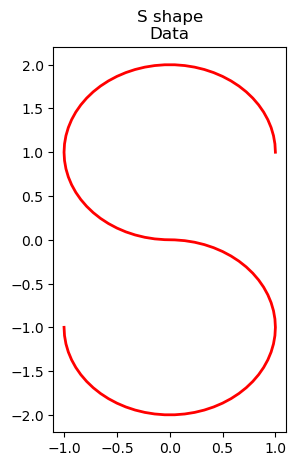

In [21]:
# Generate data
t = np.linspace(-1.5 * np.pi, 1.5 * np.pi, 100)
R = 1

y = R * np.sign(t) - R * np.sign(t) * np.cos(t / R)
x = -R * np.sin(t / R)
S_data = np.column_stack((x, y))

# Plot data
plt.figure(figsize=(3,5))
plt.plot(x, y, color='red', linewidth=2)
plt.title('S shape\nData')
plt.show()

In [14]:
# Apply Local MDS
%time S_embedding = local_mds(S_data, r=1, k=5, tau=0.5, verbose=2)

Minimizing lmds with tau=0.5, k=5
niter=100 stress=-458.16324
niter=200 stress=-620.36865
niter=300 stress=-712.68664
niter=400 stress=-771.84507
niter=500 stress=-806.91705
niter=600 stress=-828.90189
niter=700 stress=-843.82783
niter=800 stress=-853.45153
niter=900 stress=-859.24585
niter=1000 stress=-863.16112
niter=1100 stress=-865.71582
niter=1200 stress=-867.33001
niter=1300 stress=-868.31071
niter=1400 stress=-869.06699
niter=1500 stress=-869.48527
niter=1600 stress=-869.79196
niter=1700 stress=-869.97035
niter=1800 stress=-870.09625
niter=1900 stress=-870.17165
niter=2000 stress=-870.22408
niter=2100 stress=-870.25561
niter=2200 stress=-870.27559
niter=2300 stress=-870.29062
niter=2400 stress=-870.29916
niter=2500 stress=-870.30528
niter=2600 stress=-870.3089
CPU times: user 3.23 s, sys: 517 ms, total: 3.75 s
Wall time: 518 ms


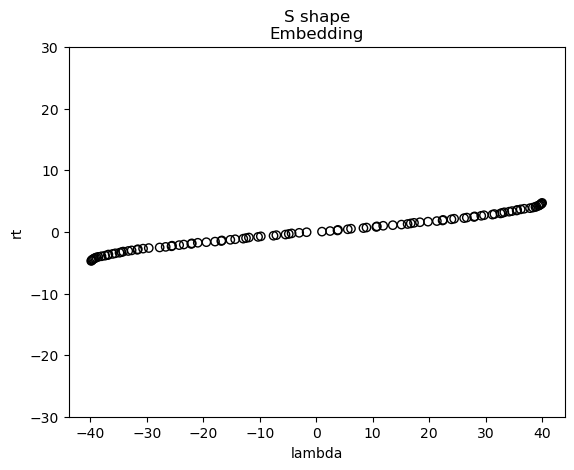

In [22]:
# Plot the Local MDS embedding
plt.scatter(S_embedding, t, facecolors='none', edgecolors='black')
plt.ylim([-30, 30])
plt.xlabel('lambda')
plt.ylabel('rt')
plt.title('S shape\nEmbedding')
plt.show()

## 2. 3D S example

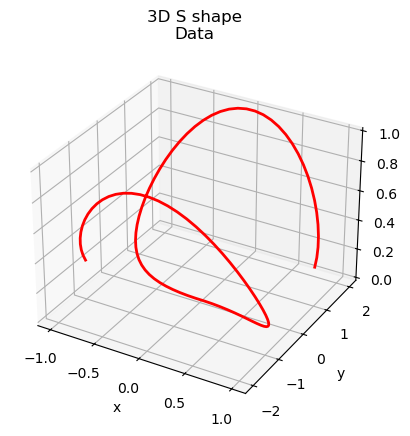

In [23]:
# Generate data
t = np.linspace(-1.5 * np.pi, 1.5 * np.pi, 100)
R = 1

y = R * np.sign(t) - R * np.sign(t) * np.cos(t / R)
x = -R * np.sin(t / R)
z = (y/(2*R))**2
S3D_data = np.column_stack((x, y))

# Plot data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(x, y, z, color='red', linewidth=2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D S shape\nData')
plt.show()

In [20]:
# Apply Local MDS
S3D_embedding = local_mds(S3D_data, r=1, k=5, tau=0.5, verbose=2)

Minimizing lmds with tau=0.5, k=5
niter=100 stress=-463.39881
niter=200 stress=-620.47588
niter=300 stress=-712.86255
niter=400 stress=-770.38942
niter=500 stress=-806.59207
niter=600 stress=-829.92945
niter=700 stress=-843.64054
niter=800 stress=-853.16225
niter=900 stress=-859.41771
niter=1000 stress=-863.26674
niter=1100 stress=-865.69616
niter=1200 stress=-867.37168
niter=1300 stress=-868.38275
niter=1400 stress=-869.02343
niter=1500 stress=-869.50589
niter=1600 stress=-869.77962
niter=1700 stress=-869.97619
niter=1800 stress=-870.09232
niter=1900 stress=-870.17334
niter=2000 stress=-870.2225
niter=2100 stress=-870.25315
niter=2200 stress=-870.27681
niter=2300 stress=-870.2899
niter=2400 stress=-870.2995
niter=2500 stress=-870.30507
niter=2600 stress=-870.309


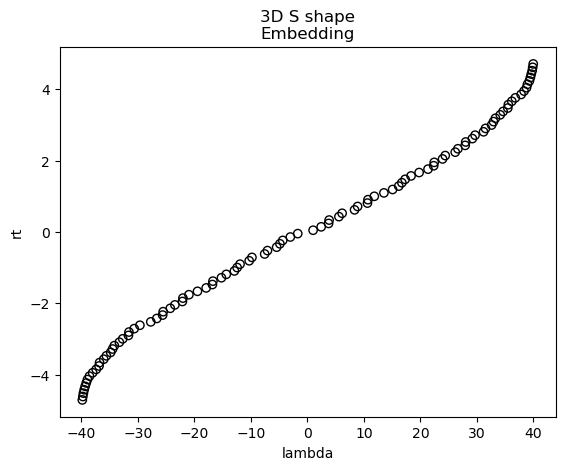

In [26]:
# Plot the Local MDS example
plt.scatter(S3D_embedding, t, facecolors='none', edgecolors='black')
plt.xlabel('lambda')
plt.ylabel('rt')
plt.title('3D S shape\nEmbedding')
plt.show()

## 3. Swiss Roll

In [20]:
X, t = make_swiss_roll(n_samples=1000, random_state=42)

In [ ]:
X[:,1] = X[:,1]*2

In [ ]:
min(X[:,1]), max(X[:,1])

(0.13516707137970463, 41.975376482368)

In [ ]:
min(t), max(t)

(4.756044768712248, 14.134506074563456)

In [21]:
embedding = lmds_R_optimized(
    squareform(pdist(X)), 2, k=10, tau=0.1, itmax=5000, verbose=2)
embedding = apply_principal_components(embedding)

Minimizing lmds with tau=0.1, k=10
niter=100 stress=-57509.25473
niter=200 stress=-66527.00297
niter=300 stress=-74618.48802
niter=400 stress=-82458.53734
niter=500 stress=-90918.8559
niter=600 stress=-101141.07552
niter=700 stress=-111309.12124
niter=800 stress=-121335.72813
niter=900 stress=-132220.03334
niter=1000 stress=-141727.84811
niter=1100 stress=-150937.20555
niter=1200 stress=-158894.05356
niter=1300 stress=-165782.63104
niter=1400 stress=-172196.82553
niter=1500 stress=-177374.62282
niter=1600 stress=-181574.26191
niter=1700 stress=-185431.99225
niter=1800 stress=-188289.07435
niter=1900 stress=-190728.49879
niter=2000 stress=-192558.3122
niter=2100 stress=-193979.65204
niter=2200 stress=-195190.34183
niter=2300 stress=-196055.96314
niter=2400 stress=-196698.8547
niter=2500 stress=-197268.32587
niter=2600 stress=-197651.9858
niter=2700 stress=-197966.5937
niter=2800 stress=-198188.76074
niter=2900 stress=-198351.59278
niter=3000 stress=-198492.44933
niter=3100 stress=-19858

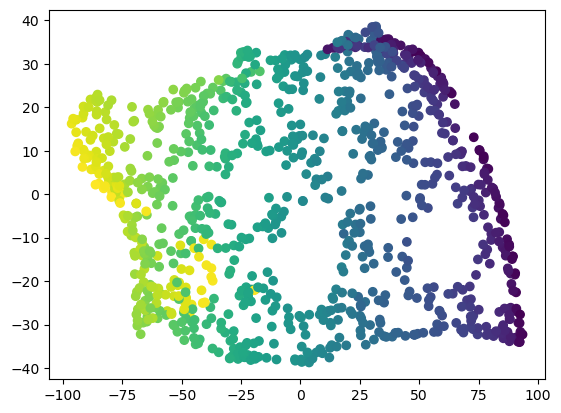

In [ ]:
plt.scatter(embedding[:,0], embedding[:,1], c=t)

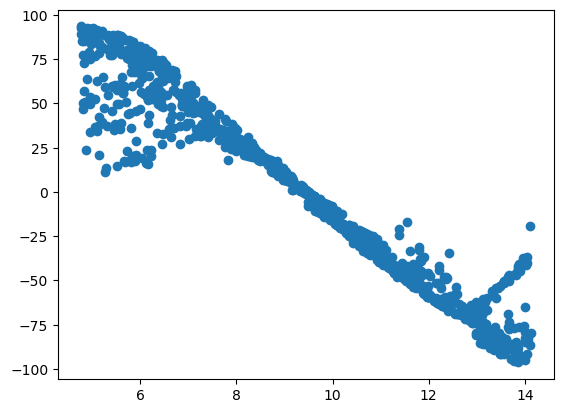

In [ ]:
plt.scatter(t,embedding[:,0])

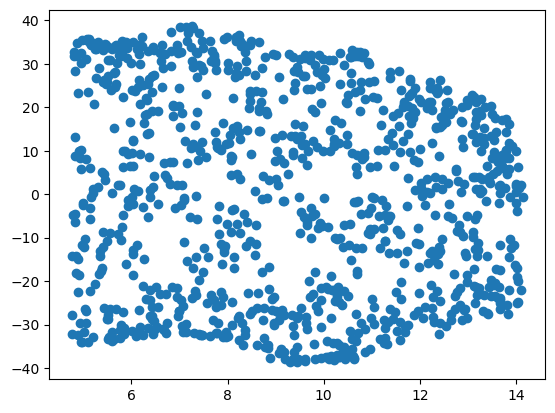

In [ ]:
plt.scatter(t, embedding[:,1])

## 4. MNIST

## 2.1 Until the 24th of April

In [15]:
# Load all_data.RData
rdata = pyreadr.read_r(os.path.join(project_root, 'd_and_c', 'MNIST.RData'))

all_data_pixels = rdata["all_data_pixels"]
target = rdata["target"]
type_data = rdata["type_data"]

target = np.squeeze(np.array(target))
type_data = np.squeeze(np.array(type_data))

# Select train images of numbers
numeric_target = pd.to_numeric(target, errors="coerce")
train_idx = (type_data == "train") & (pd.notnull(numeric_target))

MNIST_pixels = all_data_pixels.loc[train_idx].values
MNIST_target = numeric_target[train_idx]

print(f"MNIST_pixels shape: {MNIST_pixels.shape}")
print(f"MNIST_target shape: {MNIST_target.shape}")

MNIST_pixels shape: (345035, 784)
MNIST_target shape: (345035,)


In [9]:
# Split data into two equally sized partitions
n_images = MNIST_target.shape[0]
shuffled_indices = np.random.permutation(n_images)
partitions_idx = np.array_split(shuffled_indices, 2)

MNIST_pixels1 = MNIST_pixels[partitions_idx[0], :]
MNIST_target1 = MNIST_target[partitions_idx[0]]

MNIST_pixels2 = MNIST_pixels[partitions_idx[1], :]
MNIST_target2 = MNIST_target[partitions_idx[1]]

print(
    f"Partition 1 pixels shape: {MNIST_pixels1.shape}, targets shape: {MNIST_target1.shape}")
print(
    f"Partition 2 pixels shape: {MNIST_pixels2.shape}, targets shape: {MNIST_target2.shape}")

Partition 1 pixels shape: (172518, 784), targets shape: (172518,)
Partition 2 pixels shape: (172517, 784), targets shape: (172517,)


Read pickled 5000-rows-subset instead of computing it again.

In [4]:
with open(os.path.join(project_root, 'd_and_c', 'MNIST_5000.pkl'), "rb") as f:
    bare_data = pickle.load(f)
    sampled_pixels1 = bare_data["pixels"]
    sampled_target1 = bare_data["target"]

In [5]:
MNIST_bare1, time_MNIST_bare1 = benchmark(local_mds,
                                          sampled_pixels1, r=2, verbose=2)
# Save experiment results
with open(os.path.join(pickle_path, "MNIST_5000_LMDS.pkl"), "wb") as f:
    pickle.dump({"embedding": MNIST_bare1, "runtime": time_MNIST_bare1},
                f)

Minimizing lmds with tau=1.0, k=10
niter=100 stress=-3687080144645.5566
niter=200 stress=-3852878560897.1826
niter=300 stress=-3872781303986.1743
niter=400 stress=-3876649476477.744
niter=500 stress=-3877888599525.147
niter=600 stress=-3878559441611.9116
niter=700 stress=-3878983212064.1406
niter=800 stress=-3879308021558.3486
niter=900 stress=-3879646917599.212
niter=1000 stress=-3879997872746.8896
niter=1100 stress=-3880392204382.2207
niter=1200 stress=-3880751098686.2007
niter=1300 stress=-3881050403776.14
niter=1400 stress=-3881214116025.827
niter=1500 stress=-3881319831941.742
niter=1600 stress=-3881372522300.1255
niter=1700 stress=-3881403734393.633
niter=1800 stress=-3881420790290.9795
niter=1900 stress=-3881428843143.908
niter=2000 stress=-3881433593204.796
niter=2100 stress=-3881435882297.979
Converged after 2137 iterations with stress=-3881436543888.0947


In [6]:
l, c_points = 1000, 100
MNIST_dc1, time_MNIST_dc1 = benchmark(divide_conquer,
                                      DRMethod.LocalMDS, sampled_pixels1, l=l, c_points=c_points, r=2, verbose=2)
# Save experiment results
with open(os.path.join(pickle_path, "MNIST_5000_DC_LMDS.pkl"), "wb") as f:
    pickle.dump({"embedding": MNIST_dc1, "runtime": time_MNIST_dc1},
                f)

Projecting partition 1...
Minimizing lmds with tau=1.0, k=10
niter=100 stress=-475760832800.27124
niter=200 stress=-476103870540.5565
niter=300 stress=-476225980835.29956
niter=400 stress=-476295853230.1433
niter=500 stress=-476345995666.40186
niter=600 stress=-476389506234.89087
niter=700 stress=-476420274859.2523
niter=800 stress=-476448332487.1458
niter=900 stress=-476470020911.7903
niter=1000 stress=-476485724694.08905
niter=1100 stress=-476497636625.369
niter=1200 stress=-476504807193.4492
niter=1300 stress=-476509669322.5109
niter=1400 stress=-476512862109.96826
niter=1500 stress=-476515074141.5943
niter=1600 stress=-476516937586.52997
niter=1700 stress=-476518219523.74255
niter=1800 stress=-476519122626.5423
niter=1900 stress=-476519707594.6086
niter=2000 stress=-476520245089.35657
niter=2100 stress=-476520929983.8718
niter=2200 stress=-476521588323.08685
niter=2300 stress=-476521962606.04443
niter=2400 stress=-476522220863.2195
niter=2500 stress=-476522359231.34064
niter=2600 s

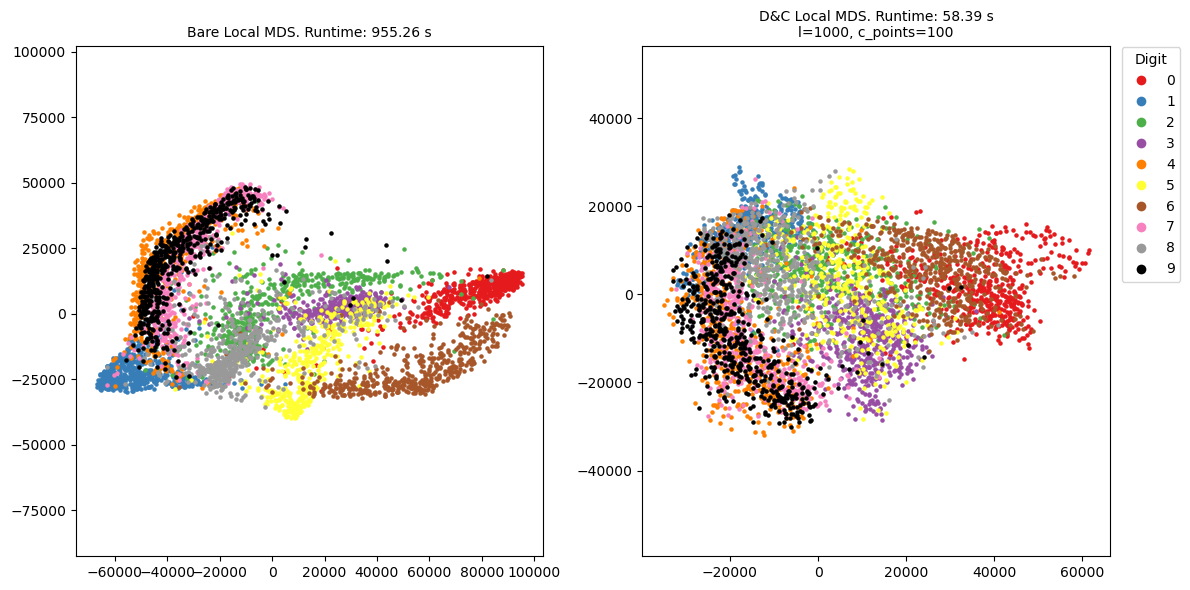

In [23]:
with open(os.path.join(pickle_path, "MNIST_5000_LMDS.pkl"), "rb") as f:
    bare_data = pickle.load(f)
    MNIST_bare1 = bare_data["embedding"]
    time_MNIST_bare1 = bare_data["runtime"]

with open(os.path.join(pickle_path, "MNIST_5000_DC_LMDS.pkl"), "rb") as f:
    dc_data = pickle.load(f)
    MNIST_dc1 = dc_data["embedding"]
    time_MNIST_dc1 = dc_data["runtime"]

# Plot the embedding
digits = np.unique(MNIST_target)

set1_colors = list(plt.get_cmap('Set1').colors)
set1_colors.append((0, 0, 0))  # Add black as RGB tuple
cmap = mcolors.ListedColormap(set1_colors)

# Create custom legend handles with larger markers
legend_handles = [mlines.Line2D([], [], linestyle='None', marker='o',
                                markersize=7,
                                markerfacecolor=cmap(i),
                                markeredgewidth=0,
                                label=int(digit))
                  for i, digit in enumerate(digits)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
# Partition 1
for i, digit in enumerate(digits):
    mask = sampled_target1 == digit
    ax1.scatter(MNIST_bare1[mask, 0], MNIST_bare1[mask, 1],
                color=cmap(i),
                label=int(digit),
                s=5)
ax1.set_title(f'Bare Local MDS. Runtime: {time_MNIST_bare1:.2f} s', fontsize=10)
ax1.axis('equal')

# Partition 2
for i, digit in enumerate(digits):
    mask = sampled_target1 == digit
    ax2.scatter(MNIST_dc1[mask, 0], MNIST_dc1[mask, 1],
                color=cmap(i),
                s=5)
ax2.set_title(
    f'D&C Local MDS. Runtime: {time_MNIST_dc1:.2f} s\nl={l}, c_points={c_points}', fontsize=10)
ax2.axis('equal')
ax2.legend(handles=legend_handles, title="Digit",
           bbox_to_anchor=(1.01, 1.01), loc='upper left')

# fig.suptitle(f'Bare vs D&C Local MDS on a {n} points random subset of MNIST')
plt.tight_layout()
plt.show()

The embedding is very bad, although better than that of SMACOF and Isomap.

Let us plot each digit separately to understand them better.

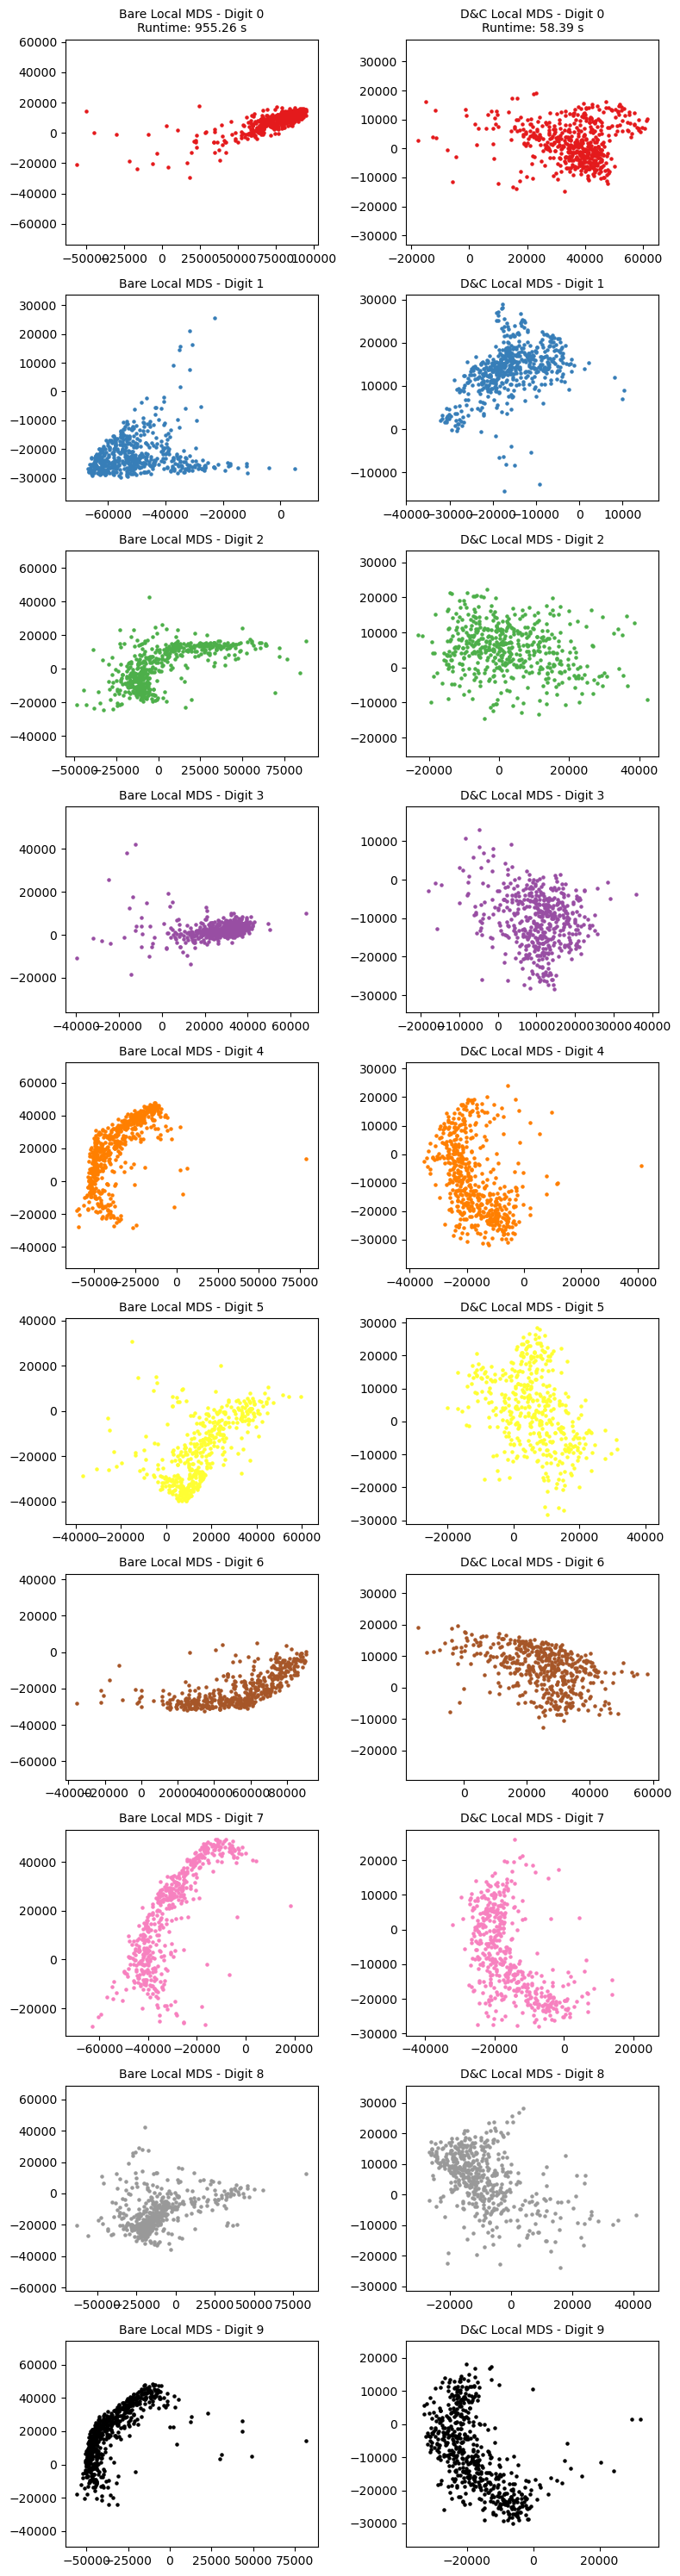

In [ ]:
# Load embeddings
with open(os.path.join(pickle_path, "MNIST_5000_LMDS.pkl"), "rb") as f:
    bare_data = pickle.load(f)
    MNIST_bare1 = bare_data["embedding"]
    time_MNIST_bare1 = bare_data["runtime"]

with open(os.path.join(pickle_path, "MNIST_5000_DC_LMDS.pkl"), "rb") as f:
    dc_data = pickle.load(f)
    MNIST_dc1 = dc_data["embedding"]
    time_MNIST_dc1 = dc_data["runtime"]

digits = np.unique(sampled_target1)

set1_colors = list(plt.get_cmap('Set1').colors)
set1_colors.append((0, 0, 0))  # Add black as RGB tuple
cmap = mcolors.ListedColormap(set1_colors)

# Create a 10x2 grid: one row per digit, columns for Bare and D&C
fig, axes = plt.subplots(len(digits), 2, figsize=(8, 30))
method_data = [
    ("Bare Local MDS", MNIST_bare1, time_MNIST_bare1),
    ("D&C Local MDS", MNIST_dc1, time_MNIST_dc1)
]

for row, digit in enumerate(digits):
    for col, (method_name, embedding, runtime) in enumerate(method_data):
        mask = sampled_target1 == digit
        ax = axes[row, col]
        ax.scatter(embedding[mask, 0], embedding[mask, 1],
                   color=cmap(row), s=5)
        if row == 0:
            ax.set_title(
                f"{method_name} - Digit {int(digit)}\nRuntime: {runtime:.2f} s", fontsize=10)
        else:
            ax.set_title(f"{method_name} - Digit {int(digit)}", fontsize=10)
        ax.axis('equal')
plt.tight_layout()
plt.show()

Next, we will apply a Procrustes transformation to digits 1-9 in order to align them with digit 0's embedding.

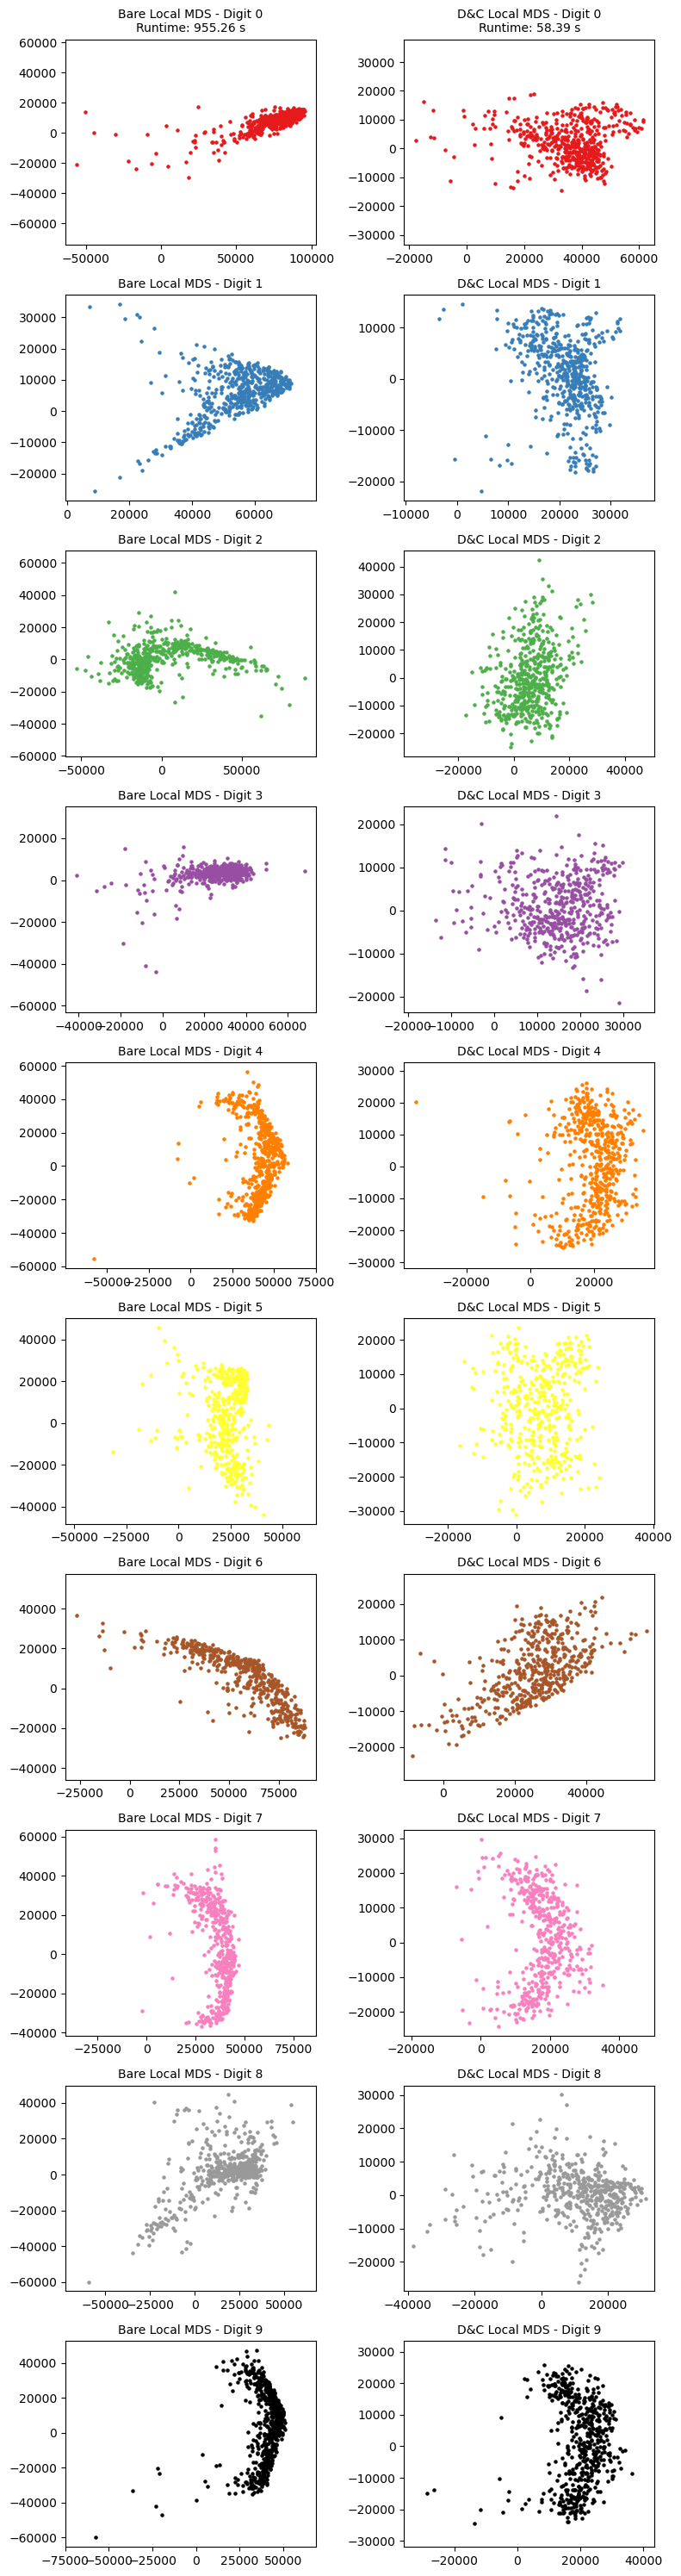

In [ ]:
digits = np.unique(sampled_target1)

set1_colors = list(plt.get_cmap('Set1').colors)
set1_colors.append((0, 0, 0))  # Add black as RGB tuple
cmap = mcolors.ListedColormap(set1_colors)


# Obtain target matrix to apply Procrustes transformation
digit_0 = MNIST_bare1[sampled_target1 == 0]
n_rows_target = digit_0.shape[0]

n_rows_digits = [MNIST_bare1[sampled_target1==digit].shape[0] for digit in digits]
c_points = min(n_rows_digits)

sampled_idx = np.random.choice(n_rows_target, size=c_points, replace=False)
target = digit_0[sampled_idx, :]

# Create a 10x2 grid: one row per digit, columns for Bare and D&C
fig, axes = plt.subplots(len(digits), 2, figsize=(8, 30))
method_data = [
    ("Bare LMDS", MNIST_bare1, time_MNIST_bare1),
    ("D&C LMDS", MNIST_dc1, time_MNIST_dc1)
]

for col, (method_name, embedding, runtime) in enumerate(method_data):
    # Obtain target matrix to apply Procrustes transformation
    digit_0 = embedding[sampled_target1 == 0]
    n_rows_target = digit_0.shape[0]

    n_rows_digits = [embedding[sampled_target1==digit].shape[0] for digit in digits]
    c_points = min(n_rows_digits)

    sampled_idx = np.random.choice(n_rows_target, size=c_points, replace=False)
    target = digit_0[sampled_idx, :]

    # Plot digit embeddings
    for row, digit in enumerate(digits):
        x = embedding[sampled_target1 == digit]
        ax = axes[row, col]
        if row == 0:
            ax.scatter(x[:,0], x[:, 1],
                       color=cmap(row), s=5)
            ax.set_title(
                f"{method_name} - Digit {int(digit)}\nRuntime: {runtime:.2f} s", fontsize=10)
        else:
            # Align x to y using perform_procrustes
            x_aligned = perform_procrustes(x[:c_points,:], target, x)
            ax.scatter(x_aligned[:,0], x_aligned[:,1],
                   color=cmap(row), s=5)
            ax.set_title(f"{method_name} - Digit {int(digit)}", fontsize=10)
        ax.axis('equal')
plt.tight_layout()
plt.show()

We will try to improve it by choosing better parameters.

In [16]:
# Smaller k (default=10)
MNIST_bare2, time_MNIST_bare2 = benchmark(local_mds,
                                          sampled_pixels1, r=2, verbose=2,
                                          k=8)
# Smaller tau (default=1)
MNIST_bare3, time_MNIST_bare3 = benchmark(local_mds,
                                          sampled_pixels1, r=2, verbose=2,
                                          tau=0.5)
# Smaller k and tau
MNIST_bare4, time_MNIST_bare4 = benchmark(local_mds,
                                          sampled_pixels1, r=2, verbose=2,
                                          k=8, tau=0.5)

Minimizing lmds with tau=1.0, k=8
niter=100 stress=-2672239380052.0513
niter=200 stress=-2846259347471.627
niter=300 stress=-2862730157722.6606
niter=400 stress=-2864757894019.802
niter=500 stress=-2865090919183.965
niter=600 stress=-2865158773788.644
niter=700 stress=-2865174231278.7656
niter=800 stress=-2865177968940.1865
Minimizing lmds with tau=0.5, k=10
niter=100 stress=-1037987928980.9957
niter=200 stress=-1059855298923.4705
niter=300 stress=-1061181458534.9639
niter=400 stress=-1061330094023.978
niter=500 stress=-1061353243751.5771
niter=600 stress=-1061360209385.5581
niter=700 stress=-1061360910410.0742
Minimizing lmds with tau=0.5, k=8
niter=100 stress=-863812090959.4922
niter=200 stress=-899479615689.1705
niter=300 stress=-901618620339.1965
niter=400 stress=-901874660398.9883
niter=500 stress=-901915589868.194
niter=600 stress=-901923118583.947
niter=700 stress=-901924760846.4937


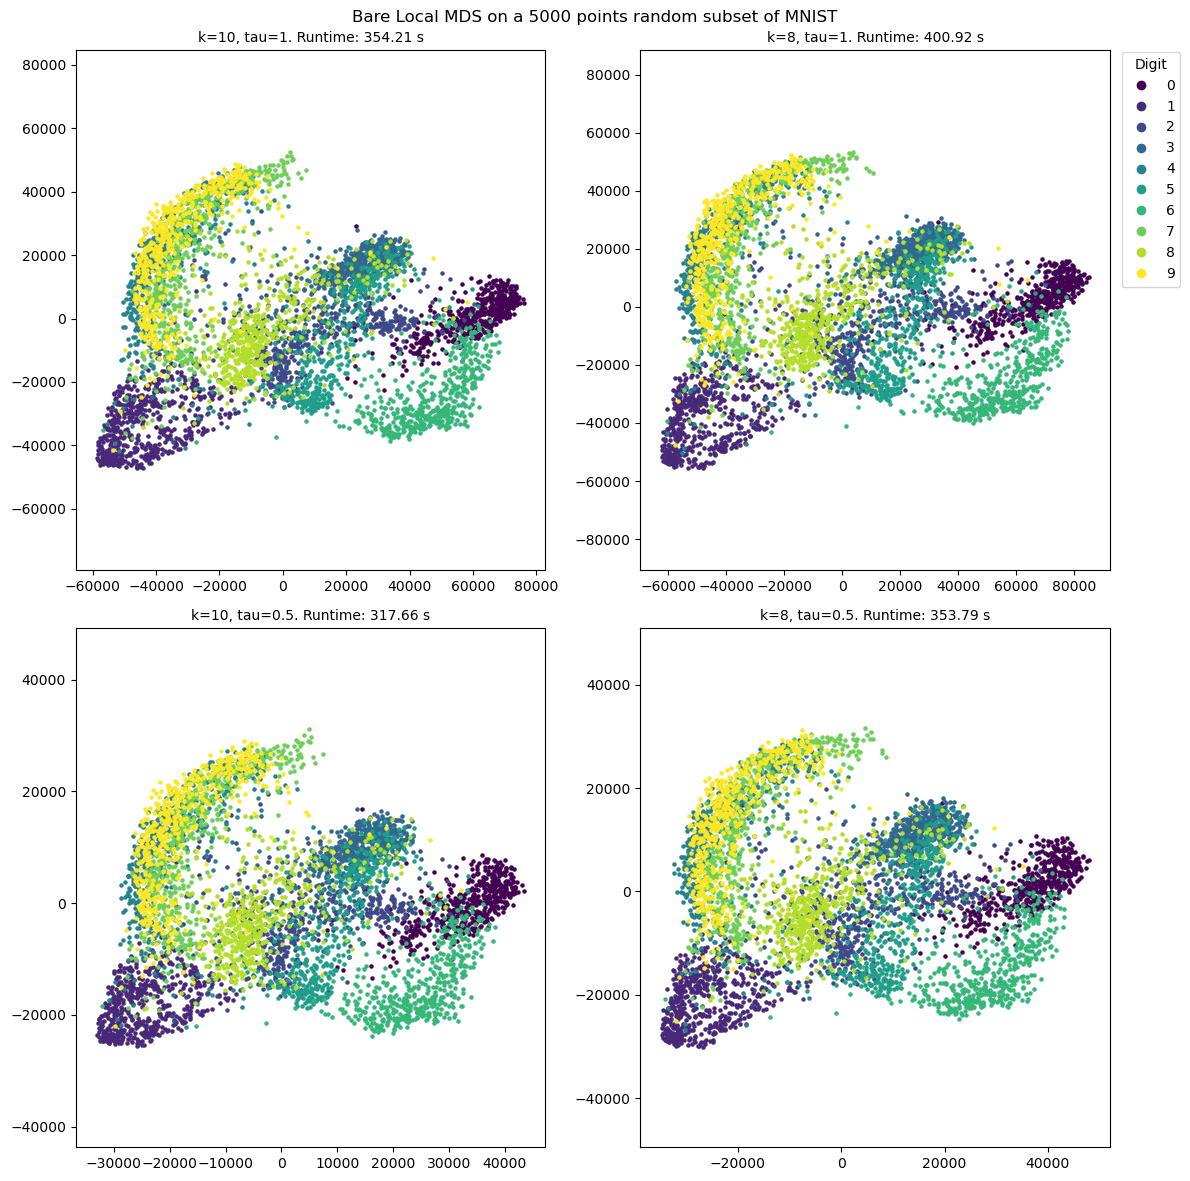

In [ ]:
# Plot the embeddings
digits = np.unique(MNIST_target)
cmap = plt.get_cmap('viridis', len(digits))
# Create custom legend handles with larger markers
legend_handles = [mlines.Line2D([], [], linestyle='None', marker='o',
                                markersize=7,
                                markerfacecolor=cmap(i),
                                markeredgewidth=0,
                                label=int(digit))
                  for i, digit in enumerate(digits)]

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
ax1, ax2, ax3, ax4 = axes.flatten()
# Partition 1
for i, digit in enumerate(digits):
    mask = sampled_target1 == digit
    ax1.scatter(MNIST_bare1[mask, 0], MNIST_bare1[mask, 1],
                color=cmap(i),
                label=int(digit),
                s=5)
ax1.set_title(
    f'k=10, tau=1. Runtime: {time_MNIST_bare1:.2f} s', fontsize=10)
ax1.axis('equal')

# Partition 2
for i, digit in enumerate(digits):
    mask = sampled_target1 == digit
    ax2.scatter(MNIST_bare2[mask, 0], MNIST_bare2[mask, 1],
                color=cmap(i),
                label=int(digit),
                s=5)
ax2.set_title(
    f'k=8, tau=1. Runtime: {time_MNIST_bare2:.2f} s', fontsize=10)
ax2.axis('equal')

# Partition 3
for i, digit in enumerate(digits):
    mask = sampled_target1 == digit
    ax3.scatter(MNIST_bare3[mask, 0], MNIST_bare3[mask, 1],
                color=cmap(i),
                label=int(digit),
                s=5)
ax3.set_title(
    f'k=10, tau=0.5. Runtime: {time_MNIST_bare3:.2f} s', fontsize=10)
ax3.axis('equal')

# Partition 4
for i, digit in enumerate(digits):
    mask = sampled_target1 == digit
    ax4.scatter(MNIST_bare4[mask, 0], MNIST_bare4[mask, 1],
                color=cmap(i),
                label=int(digit),
                s=5)
ax4.set_title(
    f'k=8, tau=0.5. Runtime: {time_MNIST_bare4:.2f} s', fontsize=10)
ax4.axis('equal')

ax2.legend(handles=legend_handles, title="Digit",
           bbox_to_anchor=(1.01, 1.01), loc='upper left')

fig.suptitle(f'Bare LMDS on a {n} points random subset of MNIST')
plt.tight_layout()
plt.show()

Embeddings do not change much, so we will stick with the deafult parameter values.

Let us try now with the whole numeric training set with D&C Local MDS.

In [18]:
l, c_points = 1000, 100


In [ ]:
MNIST_dc_full1, time_MNIST_dc_full1 = benchmark(divide_conquer,
                                      DRMethod.LocalMDS, MNIST_pixels, l=l, c_points=c_points, r=2, verbose=2)
# Save experiment results
with open(os.path.join(pickle_path, "MNIST_train_num_DC_LMDS.pkl"), "wb") as f:
    pickle.dump({"embedding": MNIST_dc_full1, "runtime": time_MNIST_dc_full1},
                f)

In [29]:
with open(os.path.join(pickle_path, "MNIST_train_num_DC_LMDS.pkl"), "rb") as f:
    dc_data = pickle.load(f)
    MNIST_dc_full1 = dc_data["embedding"]
    time_MNIST_dc_full1 = dc_data["runtime"]

# Estimate densities
digits = np.unique(MNIST_target)
densities = {}

for digit in digits:
    mask = MNIST_target == digit
    data = MNIST_dc_full1[mask].T
    kde = gaussian_kde(data)
    densities[int(digit)] = kde

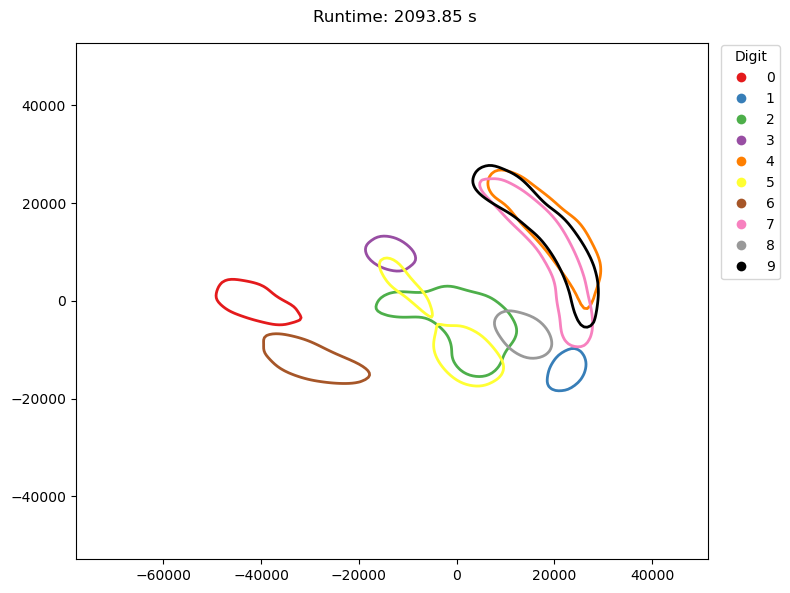

In [31]:
# Contour plot estimated densities
set1_colors = list(plt.get_cmap('Set1').colors)
set1_colors.append((0, 0, 0))  # Add black
cmap = mcolors.ListedColormap(set1_colors)

# Compute meshgrid for contours
embedding_x = MNIST_dc_full1[:,0]
embedding_y = MNIST_dc_full1[:,1]
xpad = (embedding_x.max() - embedding_x.min()) * 0.05
ypad = (embedding_y.max() - embedding_y.min()) * 0.05
xmin, xmax = embedding_x.min() - xpad, embedding_x.max() + xpad
ymin, ymax = embedding_y.min() - ypad, embedding_y.max() + ypad
xx, yy = np.meshgrid(
    np.linspace(xmin, xmax, 200),
    np.linspace(ymin, ymax, 200)
)
contour_level = 0.7

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
for i, digit in enumerate(digits):
    kde = densities[int(digit)]
    zz = kde(np.vstack([xx.ravel(), yy.ravel()])).reshape(xx.shape)
    ax.contour(xx, yy, zz, levels=[
               zz.max() * contour_level], colors=[cmap(i)], linewidths=2)
ax.axis('equal')
legend_handles = [mlines.Line2D([], [], linestyle='None', marker='o',
                                markersize=7,
                                markerfacecolor=cmap(i),
                                markeredgewidth=0,
                                label=int(digit))
                    for i, digit in enumerate(digits)]
ax.legend(handles=legend_handles, title="Digit",
            bbox_to_anchor=(1.01, 1.01), loc='upper left')
# fig.suptitle(
#     f"D&C LMDS on the {MNIST_target.shape[0]}-points numeric training dataset of MNIST\nBivariate density estimation per digit\nl={l}, c_points={c_points}, runtime: {time_MNIST_dc_full1:.2f} s")
fig.suptitle(f'Runtime: {time_MNIST_dc_full1:.2f} s')
plt.tight_layout()

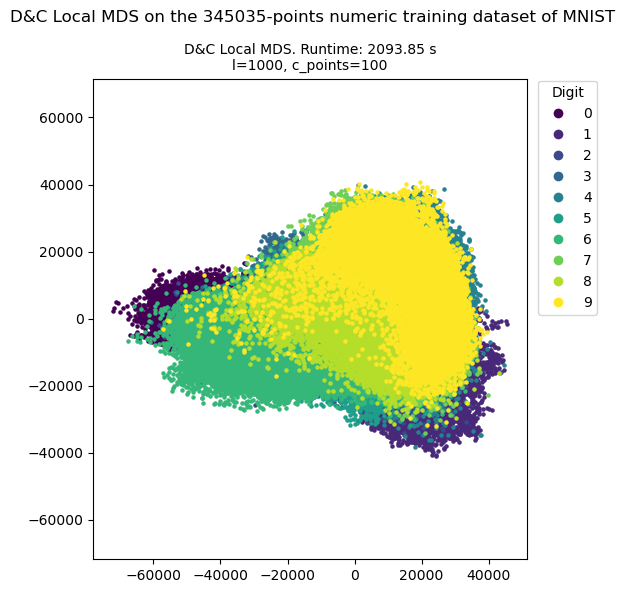

In [14]:
# Plot the embedding
digits = np.unique(MNIST_target)
cmap = plt.get_cmap('viridis', len(digits))
# Create custom legend handles with larger markers
legend_handles = [mlines.Line2D([], [], linestyle='None', marker='o',
                                markersize=7,
                                markerfacecolor=cmap(i),
                                markeredgewidth=0,
                                label=int(digit))
                  for i, digit in enumerate(digits)]

fig, ax1 = plt.subplots(1, 1, figsize=(6, 6))
for i, digit in enumerate(digits):
    mask = MNIST_target == digit
    ax1.scatter(MNIST_dc_full1[mask, 0], MNIST_dc_full1[mask, 1],
                color=cmap(i),
                label=int(digit),
                s=5)
ax1.set_title(
    f'D&C Local MDS. Runtime: {time_MNIST_dc_full1:.2f} s\nl={l}, c_points={c_points}', fontsize=10)
ax1.axis('equal')
ax1.legend(handles=legend_handles, title="Digit",
           bbox_to_anchor=(1.01, 1.01), loc='upper left')

fig.suptitle(
    f'D&C Local MDS on the {MNIST_target.shape[0]}-points numeric training dataset of MNIST')
plt.tight_layout()
plt.show()

## 2.2 From the 25th of April

In [3]:
# Load data and embeddings
with open(os.path.join(project_root, 'd_and_c', 'MNIST_5000.pkl'), "rb") as f:
    bare_data = pickle.load(f)
    sampled_pixels1 = bare_data["pixels"]
    sampled_target1 = bare_data["target"]

with open(os.path.join(pickle_path, "MNIST_5000_LMDS.pkl"), "rb") as f:
    bare_data = pickle.load(f)
    MNIST_bare1 = bare_data["embedding"]
    time_MNIST_bare1 = bare_data["runtime"]

with open(os.path.join(pickle_path, "MNIST_5000_DC_LMDS.pkl"), "rb") as f:
    dc_data = pickle.load(f)
    MNIST_dc1 = dc_data["embedding"]
    time_MNIST_dc1 = dc_data["runtime"]

Compute Pearson correlation between embeddings' dimensions of each digit.

In [5]:
digits = np.unique(sampled_target1)
correlations = {"Digit": [], "Corr_dim1": [], "Corr_dim2": []}

for digit in digits:
    mask = sampled_target1 == digit
    bare = MNIST_bare1[mask]
    dc = MNIST_dc1[mask]
    corr_dim0 = pearsonr(bare[:, 0], dc[:, 0])[0]
    corr_dim1 = pearsonr(bare[:, 1], dc[:, 1])[0]
    correlations["Digit"].append(int(digit))
    correlations["Corr_dim1"].append(corr_dim0)
    correlations["Corr_dim2"].append(corr_dim1)

df_corr = pd.DataFrame(correlations)
display(df_corr)

,Digit,Corr_dim1,Corr_dim2
0,0,0.869986,-0.407439
1,1,0.200135,-0.604545
2,2,0.867037,-0.541411
3,3,0.815955,-0.413308
4,4,0.747551,-0.959998
5,5,0.792937,-0.881516
6,6,0.862116,-0.731266
7,7,0.783765,-0.959170
8,8,0.834985,-0.824990
9,9,0.854669,-0.953579


In [6]:
# Total correlation
print(f'Total correlation of dim1: {pearsonr(MNIST_bare1[:, 0], MNIST_dc1[:, 0])[0]}')
print(f'Total correlation of dim2: {pearsonr(MNIST_bare1[:, 1], MNIST_dc1[:, 1])[0]}')

Total correlation of dim1: 0.9489962757561992
Total correlation of dim2: -0.8206029210441554


Estimate bivariate densities of each digit for both embeddings after applying a Procrustes transformation.

In [5]:
# Apply procrustes
digits_unique = np.unique(sampled_target1)
MNIST_dc1_procrustes = np.empty_like(
    MNIST_dc1)  # Initialize array for results

for digit_val in digits_unique:
    mask = (sampled_target1 == digit_val)

    bare_subset_digit = MNIST_bare1[mask]
    dc_subset_digit = MNIST_dc1[mask]

    # Get c_points of x and target
    c_points = min(
        bare_subset_digit.shape[0], dc_subset_digit.shape[0])

    x_ref = dc_subset_digit[:c_points, :]
    target_ref = bare_subset_digit[:c_points, :]

    aligned_dc_subset_digit = perform_procrustes(
        x_ref, target_ref, dc_subset_digit)
    MNIST_dc1_procrustes[mask] = aligned_dc_subset_digit

In [6]:
# Estimate densities
digits = np.unique(sampled_target1)
densities = {}

for method_name, embedding in [("Bare LMDS", MNIST_bare1), ("D&C LMDS", MNIST_dc1_procrustes)]:
    densities[method_name] = {}
    for digit in digits:
        mask = sampled_target1 == digit
        data = embedding[mask].T
        kde = gaussian_kde(data)
        densities[method_name][int(digit)] = kde

In [7]:
n = 5000

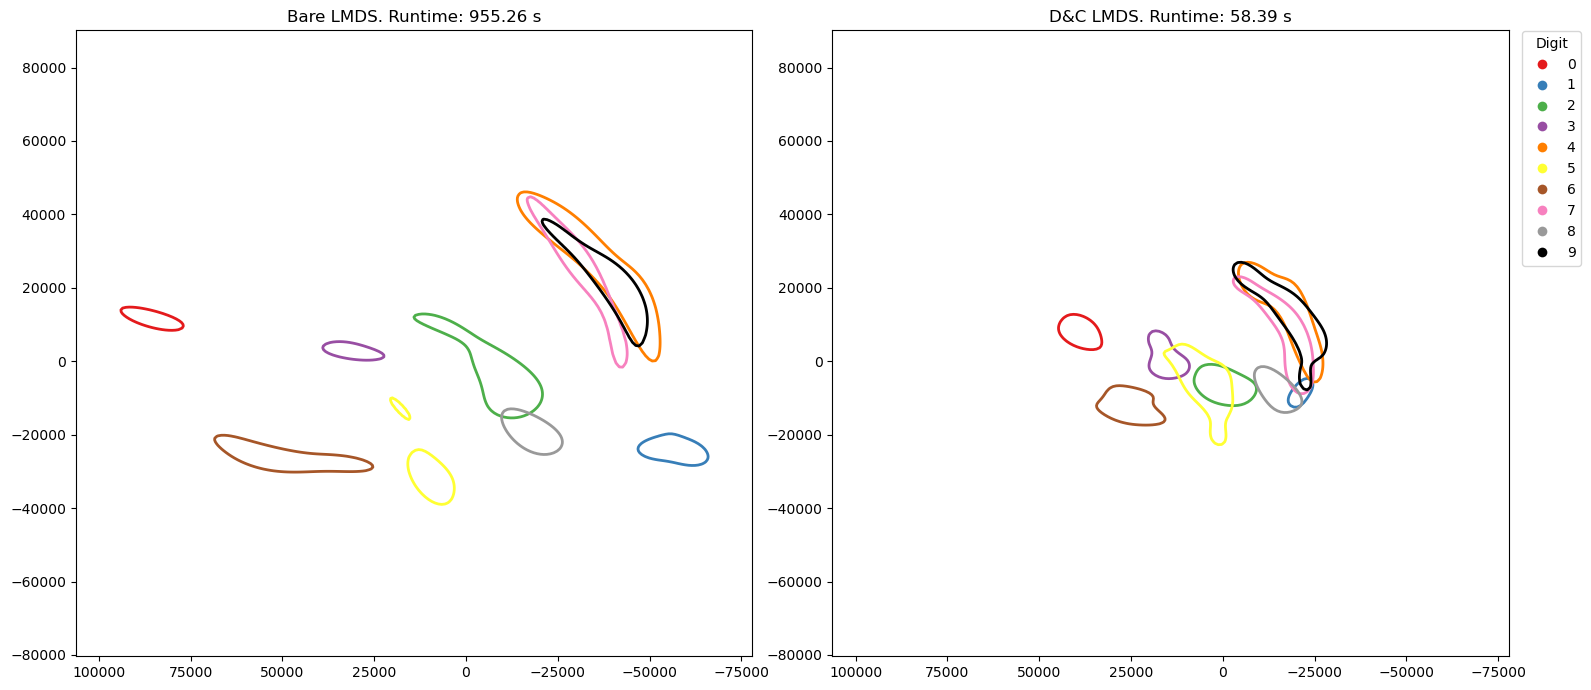

In [9]:
# Contour plot estimated densities
set1_colors = list(plt.get_cmap('Set1').colors)
set1_colors.append((0, 0, 0))  # Add black if needed
cmap = mcolors.ListedColormap(set1_colors)

method_names = ["Bare LMDS", "D&C LMDS"]
embeddings = [MNIST_bare1, MNIST_dc1_procrustes]
runtimes = {"Bare LMDS": time_MNIST_bare1, "D&C LMDS": time_MNIST_dc1}

# Compute meshgrid for contours
all_x = np.concatenate([emb[:, 0] for emb in embeddings])
all_y = np.concatenate([emb[:, 1] for emb in embeddings])
xpad = (all_x.max() - all_x.min()) * 0.05
ypad = (all_y.max() - all_y.min()) * 0.05
xmin, xmax = all_x.min() - xpad, all_x.max() + xpad
ymin, ymax = all_y.min() - ypad, all_y.max() + ypad
xx, yy = np.meshgrid(
    np.linspace(xmin, xmax, 200),
    np.linspace(ymin, ymax, 200)
)

fig, axes = plt.subplots(1, 2, figsize=(16, 7))
contour_level = 0.7

for col, method in enumerate(method_names):
    ax = axes[col]
    for i, digit in enumerate(digits):
        kde = densities[method][int(digit)]
        zz = kde(np.vstack([xx.ravel(), yy.ravel()])).reshape(xx.shape)
        ax.contour(xx, yy, zz, levels=[zz.max() * contour_level], colors=[cmap(i)], linewidths=2)
    ax.set_title(f"{method}. Runtime: {runtimes[method]:.2f} s")
    ax.axis('equal')
    ax.invert_xaxis()
    if col == 1:
        # Custom legend on the right plot
        legend_handles = [mlines.Line2D([], [], linestyle='None', marker='o',
                                        markersize=7,
                                        markerfacecolor=cmap(i),
                                        markeredgewidth=0,
                                        label=int(digit))
                          for i, digit in enumerate(digits)]
        ax.legend(handles=legend_handles, title="Digit",
                  bbox_to_anchor=(1.01, 1.01), loc='upper left')
# fig.suptitle(
#     f"LMDS's embedding of {n} points MNIST subset\nBivariate density estimation per digit and method\nafter Procrustes transformation.\nContour lines at {contour_level*100:.0f}%", fontsize=16, y=1.03)
plt.tight_layout()
plt.show()

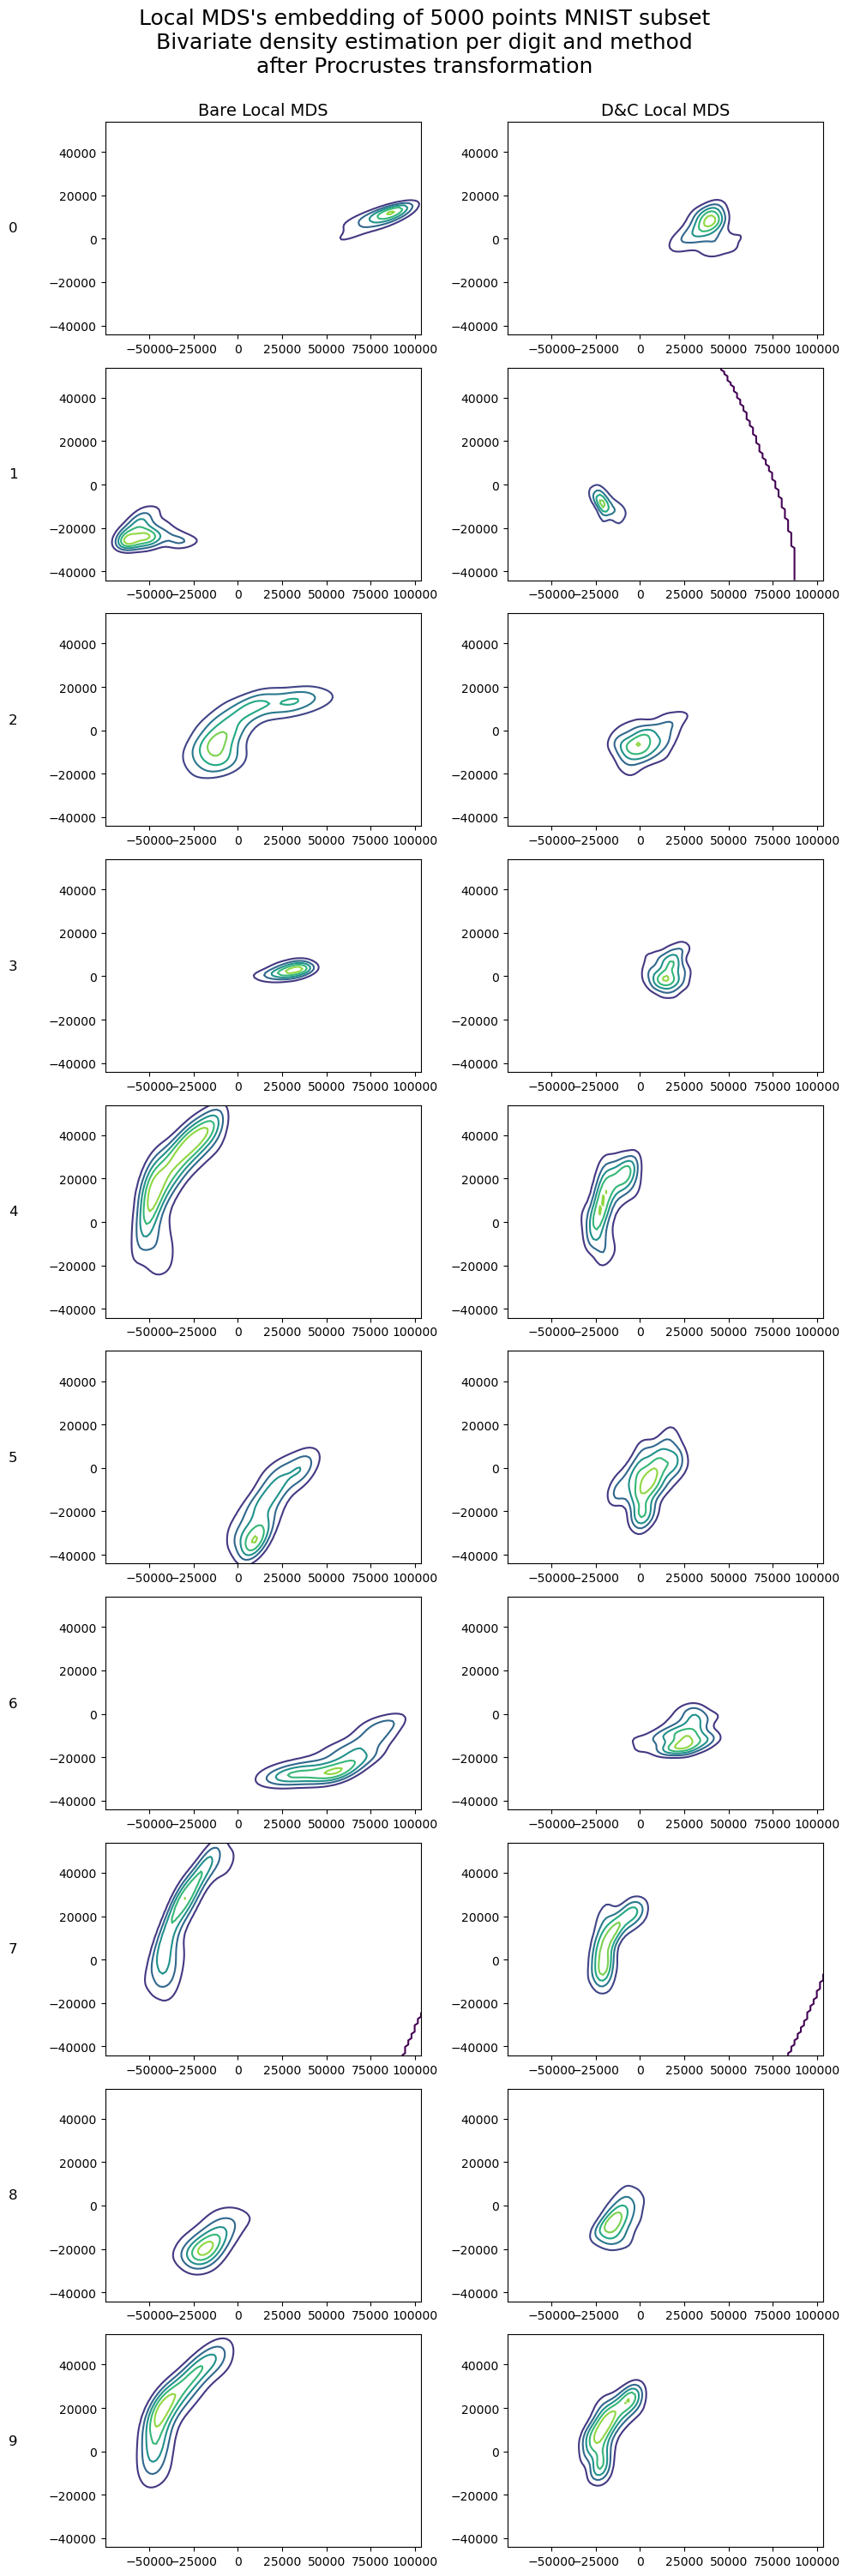

In [9]:
# Compare each digit with more contour lines
digits = np.unique(sampled_target1)
method_names = ["Bare Local MDS", "D&C Local MDS"]

# Compute meshgrid across all digits and methods
all_x = np.concatenate([MNIST_bare1[:, 0], MNIST_dc1_procrustes[:, 0]])
all_y = np.concatenate([MNIST_bare1[:, 1], MNIST_dc1_procrustes[:, 1]])
xpad = (all_x.max() - all_x.min()) * 0.05
ypad = (all_y.max() - all_y.min()) * 0.05
xmin, xmax = all_x.min() - xpad, all_x.max() + xpad
ymin, ymax = all_y.min() - ypad, all_y.max() + ypad

xx, yy = np.meshgrid(
    np.linspace(xmin, xmax, 100),
    np.linspace(ymin, ymax, 100)
)

# Create plot grid
fig, axes = plt.subplots(len(digits), len(method_names), figsize=(
    10, 30), sharex=False, sharey=False)
for row, digit in enumerate(digits):
    for col, method in enumerate(method_names):
        ax = axes[row, col]
        kde = densities[method][int(digit)]
        zz = kde(np.vstack([xx.ravel(), yy.ravel()])).reshape(xx.shape)
        ax.contour(xx, yy, zz, levels=5, cmap='viridis')
        if col == 0:
            ax.set_ylabel(f"{int(digit)}", fontsize=12,
                          rotation=0, labelpad=30, va='center')
        if row == 0:
            ax.set_title(method_names[col], fontsize=14)
fig.suptitle(f"Local MDS's embedding of {n} points MNIST subset\nBivariate density estimation per digit and method\nafter Procrustes transformation",
             fontsize=18, y=1)
plt.tight_layout()
plt.show()

Similarly to the 5000 points subset, classification with D&C Local MDS is very bad. 